<a href="https://colab.research.google.com/github/jvrocha0/streamlit-example/blob/master/ProjetoML2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: Análise de sentimento - Modelos de Machine Learning

## Aluno: João Vitor Rocha Lima
## Professor: Caio Ponte

## Ciência de Dados - UNIFOR

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re
import timeit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Amazon_Unlocked_Mobile.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [49]:
df.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [50]:
#tornando todo o texto do dataframe minúsculo
df = df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

#apagando qualquer linha com valores nulos
df=df.dropna()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334335 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  334335 non-null  object 
 1   Brand Name    334335 non-null  object 
 2   Price         334335 non-null  float64
 3   Rating        334335 non-null  int64  
 4   Reviews       334335 non-null  object 
 5   Review Votes  334335 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.9+ MB


In [52]:
#apagar colunas q não serão utilizadas
df = df.drop(['Product Name', 'Brand Name', 'Price','Review Votes'], axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334335 entries, 0 to 413839
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Rating   334335 non-null  int64 
 1   Reviews  334335 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.7+ MB


In [54]:
#avaliando estilo de texto nas avaliações
for i in range(5):
    print(df['Reviews'].iloc[i],'/n')

i feel so lucky to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. my son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! thank you seller, we really appreciate it & your honesty re: said used phone.i recommend this seller very highly & would but from them again!! /n
nice phone, nice up grade from my pantach revue. very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung /n
very pleased /n
it works good but it goes slow sometimes but its a very good phone i love it /n
great phone to replace my lost phone. the only thing is the volume up button does not work, but i can still go into settings to adjust. other than that, it does the job until i am eligible to upgrade my phone again.thaanks! /n


In [55]:
#Limpeza do texto (regex e stop_words) e tokenizing
def data_processing(text):

    #apaga links
    text = re.sub(r'http\S+www\S+|https\S+', '', text, flags= re.MULTILINE)

    #apaga caracteres especiais
    text = re.sub(r'[^\w\s]','',text)

    #separa palavra por palavra
    text_tokens = word_tokenize(text)

    #apaga stop words (artigos, preposições etc)
    filtered_text = [w for w in text_tokens if not w in stop_words]

    return " ".join(filtered_text)

In [56]:
start = timeit.default_timer()

df.Reviews = df['Reviews'].apply(data_processing)

stop = timeit.default_timer()
print('Tempo: ', round((stop - start),2), 'segundos')

Tempo:  77.32 segundos


In [57]:
#removendo sufixos comuns do inglês
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [58]:
start = timeit.default_timer()

df['Reviews'] = df['Reviews'].apply(lambda x: stemming(x))

stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'segundos')

Time:  26.04 segundos


In [59]:
#avaliando texto após processamento
for i in range(5):
    print(df['Reviews'].iloc[i],'/n')

feel lucky found used phone us used hard phone line someone upgraded sold one son liked old one finally fell apart 25 years didnt want upgrade thank seller really appreciate honesty said used phonei recommend seller highly would /n
nice phone nice grade pantach revue clean set easy set never android phone fantastic say least perfect size surfing social media great phone samsung /n
pleased /n
works good goes slow sometimes good phone love /n
great phone replace lost phone thing volume button work still go settings adjust job eligible upgrade phone againthaanks /n


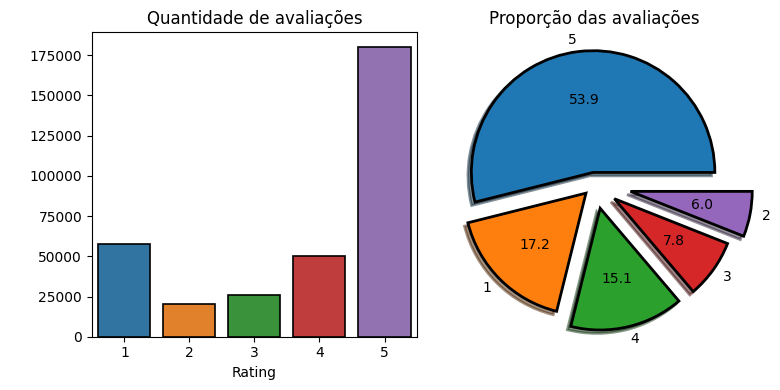

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(x='Rating', data=df, ax=axes[0], edgecolor='black', linewidth=1.2)
axes[0].set_title('Quantidade de avaliações')
axes[0].set_ylabel(' ')

wp = {'linewidth': 2, 'edgecolor': 'black'}
explode = (0.1, 0.1, 0.2, 0.2, 0.3)
tag = df['Rating'].value_counts()
tag.plot(kind='pie', title='Proporção das avaliações', autopct='%1.1f',
         shadow=True, startangle=0, wedgeprops=wp,
         explode=explode, ax=axes[1], label='')

plt.tight_layout()
plt.show()

In [61]:
#categorizando as avaliações
def categorize_rating(rating):
    if rating == 5:
        return 'positive'
    elif rating in [3, 4]:
        return 'neutral'
    else:
        return 'negative'

In [62]:
df['Sentiment'] = df['Rating'].apply(categorize_rating)

In [63]:
#categorizando o sentimento
def categorize_sentiment(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'neutral':
        return 0
    else:
        return -1

In [64]:
df['Cat_Sentiment'] = df['Sentiment'].apply(categorize_sentiment)

In [65]:
df.head(5)

,Rating,Reviews,Sentiment,Cat_Sentiment
0,5,feel lucky found used phone us used hard phone...,positive,1
1,4,nice phone nice grade pantach revue clean set ...,neutral,0
2,5,pleased,positive,1
3,4,works good goes slow sometimes good phone love,neutral,0
4,4,great phone replace lost phone thing volume bu...,neutral,0


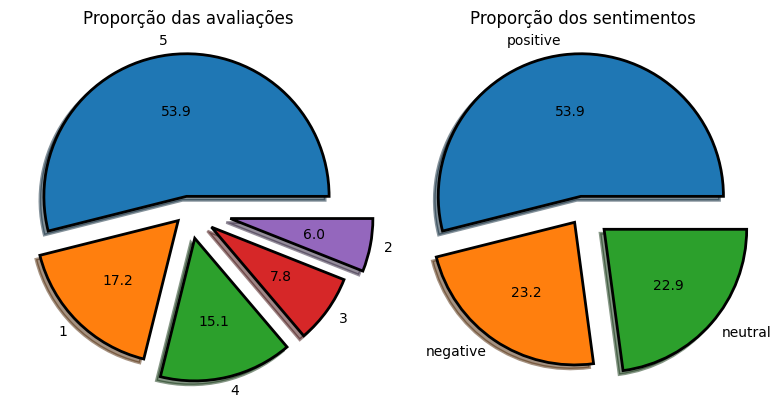

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

wp = {'linewidth': 2, 'edgecolor': 'black'}
explode = (0.1, 0.1, 0.2, 0.2, 0.3)
tag = df['Rating'].value_counts()
tag.plot(kind='pie', title='Proporção das avaliações', autopct='%1.1f',
         shadow=True, startangle=0, wedgeprops=wp,
         explode=explode, ax=axes[0], label='')

wp = {'linewidth': 2, 'edgecolor': 'black'}
explode = (0.1, 0.1, 0.2)
tag = df['Sentiment'].value_counts()
tag.plot(kind='pie', title='Proporção dos sentimentos', autopct='%1.1f',
         shadow=True, startangle=0, wedgeprops=wp,
         explode=explode, ax=axes[1], label='')

plt.tight_layout()
plt.show()

# Aplicando modelo
Rating 5 = positive

Rating 3, 4 = neutral

Rating 1, 2 = negative

In [22]:
#separando feature e target
X = df['Reviews']
Y = df['Cat_Sentiment']

In [23]:
#aplicando CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['Reviews'])

In [24]:
#separando dado de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (267468, 116032)
Size of y_train:  (267468,)
Size of x_test:  (66867, 116032)
Size of y_test:  (66867,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
start = timeit.default_timer()

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'segundos')

Test accuracy: 82.00%
Time:  246.55 segundos


In [27]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))
print('\n')
print('O modelo não apresentou bom resultado para a previsão de sentimento neutro,')
print('então será ignorado e a partir de agora os Rating 1, 2 e 3 serão considerados')
print('avaliações negativas e os Ratings 4 e 5 positivas.')

[[13448  1092  1069]
 [ 1675  7540  6038]
 [  499  1665 33841]]


              precision    recall  f1-score   support

          -1       0.86      0.86      0.86     15609
           0       0.73      0.49      0.59     15253
           1       0.83      0.94      0.88     36005

    accuracy                           0.82     66867
   macro avg       0.81      0.77      0.78     66867
weighted avg       0.81      0.82      0.81     66867



O modelo não apresentou bom resultado para a previsão de sentimento neutro,
então será ignorado e a partir de agora os Rating 1, 2 e 3 serão considerados
avaliações negativas e os Ratings 4 e 5 positivas.


In [28]:
from sklearn.naive_bayes import MultinomialNB
#frequentemente usado em problemas de classificação de texto
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 77.46%


In [29]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[12522  1496  1591]
 [ 2171  5692  7390]
 [  844  1581 33580]]


              precision    recall  f1-score   support

          -1       0.81      0.80      0.80     15609
           0       0.65      0.37      0.47     15253
           1       0.79      0.93      0.85     36005

    accuracy                           0.77     66867
   macro avg       0.75      0.70      0.71     66867
weighted avg       0.76      0.77      0.76     66867



# Reorganizando dado para duas categorias de sentimento
Rating 4, 5 = positive

Rating 1, 2, 3 = negative

In [30]:
df.head(5)

,Rating,Reviews,Sentiment,Cat_Sentiment
0,5,feel lucky found used phone us used hard phone...,positive,1
1,4,nice phone nice grade pantach revue clean set ...,neutral,0
2,5,pleased,positive,1
3,4,works good goes slow sometimes good phone love,neutral,0
4,4,great phone replace lost phone thing volume bu...,neutral,0


In [31]:
#categorizando as avaliações
def categorize_rating2(rating):
    if rating in [4, 5]:
        return 'positive'
    else:
        return 'negative'

In [32]:
df['Sentiment'] = df['Rating'].apply(categorize_rating2)

In [33]:
#categorizando o sentimento
def categorize_sentiment2(sentiment):
    if sentiment == 'positive':
        return 1
    else:
        return -1

In [34]:
df['Cat_Sentiment'] = df['Sentiment'].apply(categorize_sentiment2)

In [35]:
df.head(5)

,Rating,Reviews,Sentiment,Cat_Sentiment
0,5,feel lucky found used phone us used hard phone...,positive,1
1,4,nice phone nice grade pantach revue clean set ...,positive,1
2,5,pleased,positive,1
3,4,works good goes slow sometimes good phone love,positive,1
4,4,great phone replace lost phone thing volume bu...,positive,1


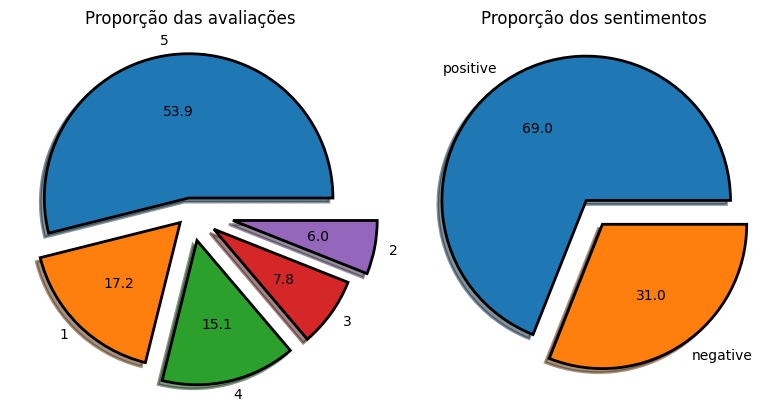

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

wp = {'linewidth': 2, 'edgecolor': 'black'}
explode = (0.1, 0.1, 0.2, 0.2, 0.3)
tag = df['Rating'].value_counts()
tag.plot(kind='pie', title='Proporção das avaliações', autopct='%1.1f',
         shadow=True, startangle=0, wedgeprops=wp,
         explode=explode, ax=axes[0], label='')

wp = {'linewidth': 2, 'edgecolor': 'black'}
explode = (0.1, 0.1)
tag = df['Sentiment'].value_counts()
tag.plot(kind='pie', title='Proporção dos sentimentos', autopct='%1.1f',
         shadow=True, startangle=0, wedgeprops=wp,
         explode=explode, ax=axes[1], label='')

plt.tight_layout()
plt.show()

In [37]:
#separando feature e target
X = df['Reviews']
Y = df['Cat_Sentiment']

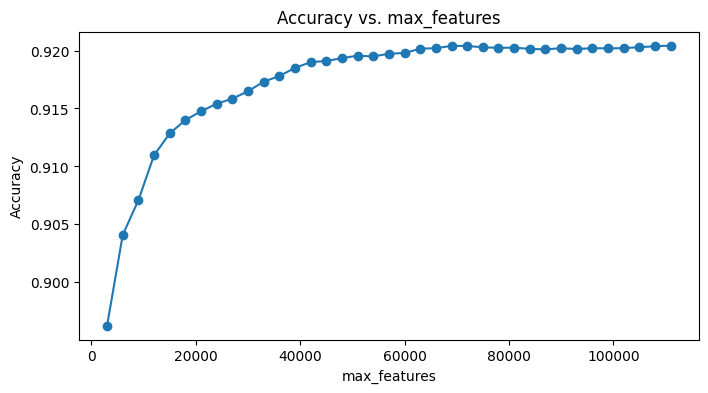

Time:  40.13 minutos


In [ ]:
start = timeit.default_timer()

max_features_values = range(3000, 114000, 3000)
accuracies = []

for max_features in max_features_values:

    vectorizer = CountVectorizer(max_features=max_features)

    X_transformed = vectorizer.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y,
                                                        test_size=0.2,
                                                        random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


plt.figure(figsize=(8, 4))
plt.plot(max_features_values, accuracies, marker='o')

plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_features')

plt.show()

stop = timeit.default_timer()
print('Time: ', round((stop - start)/60,2), 'minutos')

In [ ]:
best_accuracy = max(accuracies)
best_max_features = max_features_values[accuracies.index(best_accuracy)]
print(f"A melhor acurácia é ({best_accuracy:.2f}), e é alcançada com max_features = {best_max_features}")

A melhor acurácia é (0.92), e é alcançada com max_features = 111000


In [38]:
#aplicando CountVectorizer
cv = CountVectorizer(max_features=111000)
X = cv.fit_transform(df['Reviews'])

In [39]:
#separando dado de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (267468, 111000)
Size of y_train:  (267468,)
Size of x_test:  (66867, 111000)
Size of y_test:  (66867,)


In [40]:
start = timeit.default_timer()

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'segundos')

Test accuracy: 92.04%
Time:  62.1 segundos


In [41]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[17313  3524]
 [ 1796 44234]]


              precision    recall  f1-score   support

          -1       0.91      0.83      0.87     20837
           1       0.93      0.96      0.94     46030

    accuracy                           0.92     66867
   macro avg       0.92      0.90      0.91     66867
weighted avg       0.92      0.92      0.92     66867



In [42]:
start = timeit.default_timer()

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'segundos')

Test accuracy: 89.49%
Time:  0.11 segundos


In [43]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[16204  4633]
 [ 2395 43635]]


              precision    recall  f1-score   support

          -1       0.87      0.78      0.82     20837
           1       0.90      0.95      0.93     46030

    accuracy                           0.89     66867
   macro avg       0.89      0.86      0.87     66867
weighted avg       0.89      0.89      0.89     66867



# Reorganizando dado para duas novas categorias de sentimento
Rating 5 = positive

Rating 1, 2, 3, 4 = negative

In [ ]:
df.head(5)

,Rating,Reviews,Sentiment,Cat_Sentiment
0,5,feel lucky found used phone us used hard phone...,positive,1
1,4,nice phone nice grade pantach revue clean set ...,positive,1
2,5,pleased,positive,1
3,4,works good goes slow sometimes good phone love,positive,1
4,4,great phone replace lost phone thing volume bu...,positive,1


In [ ]:
#categorizando as avaliações
def categorize_rating3(rating):
    if rating == 5:
        return 'positive'
    else:
        return 'negative'

In [ ]:
df['Sentiment'] = df['Rating'].apply(categorize_rating3)

In [ ]:
#categorizando o sentimento
def categorize_sentiment3(sentiment):
    if sentiment == 'positive':
        return 1
    else:
        return -1

In [ ]:
df['Cat_Sentiment'] = df['Sentiment'].apply(categorize_sentiment3)

In [ ]:
df.head(5)

,Rating,Reviews,Sentiment,Cat_Sentiment
0,5,feel lucky found used phone us used hard phone...,positive,1
1,4,nice phone nice grade pantach revue clean set ...,negative,-1
2,5,pleased,positive,1
3,4,works good goes slow sometimes good phone love,negative,-1
4,4,great phone replace lost phone thing volume bu...,negative,-1


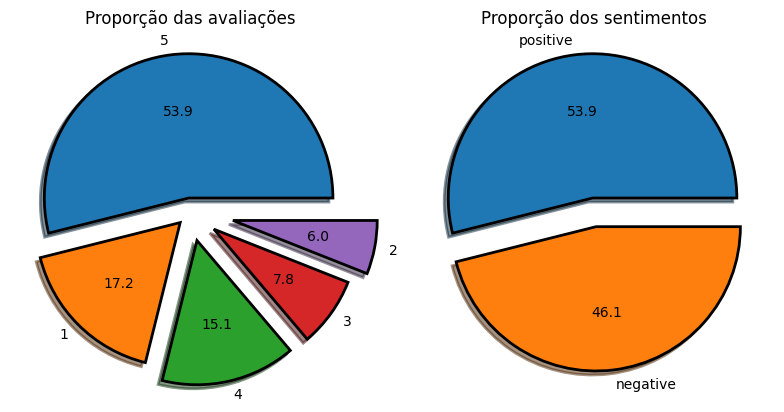

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

wp = {'linewidth': 2, 'edgecolor': 'black'}
explode = (0.1, 0.1, 0.2, 0.2, 0.3)
tag = df['Rating'].value_counts()
tag.plot(kind='pie', title='Proporção das avaliações', autopct='%1.1f',
         shadow=True, startangle=0, wedgeprops=wp,
         explode=explode, ax=axes[0], label='')

wp = {'linewidth': 2, 'edgecolor': 'black'}
explode = (0.1, 0.1)
tag = df['Sentiment'].value_counts()
tag.plot(kind='pie', title='Proporção dos sentimentos', autopct='%1.1f',
         shadow=True, startangle=0, wedgeprops=wp,
         explode=explode, ax=axes[1], label='')

plt.tight_layout()
plt.show()

In [ ]:
#separando feature e target
X = df['Reviews']
Y = df['Cat_Sentiment']

In [ ]:
#aplicando CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['Reviews'])

In [ ]:
#separando dado de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (267468, 116032)
Size of y_train:  (267468,)
Size of x_test:  (66867, 116032)
Size of y_test:  (66867,)


In [ ]:
start = timeit.default_timer()

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'segundos')

Test accuracy: 86.18%
Time:  81.55 segundos


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))
print('\n')
print('A acurácia do modelo incluindo Rating-4 como sentimento negativo é menor')
print('do que o contrário mesmo tornando o dado mais balanceado. Conclui-se que')
print('Rating-4 são avaliações positivas em sua maioria.')

[[24525  6337]
 [ 2907 33098]]


              precision    recall  f1-score   support

          -1       0.89      0.79      0.84     30862
           1       0.84      0.92      0.88     36005

    accuracy                           0.86     66867
   macro avg       0.87      0.86      0.86     66867
weighted avg       0.86      0.86      0.86     66867



A acurácia do modelo incluindo Rating-4 como sentimento negativo é menor
do que o contrário mesmo tornando o dado mais balanceado. Conclui-se que
Rating-4 são avaliações positivas em sua maioria.


In [ ]:
start = timeit.default_timer()

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'segundos')

Test accuracy: 83.33%
Time:  0.11 segundos


In [ ]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[22559  8303]
 [ 2845 33160]]


              precision    recall  f1-score   support

          -1       0.89      0.73      0.80     30862
           1       0.80      0.92      0.86     36005

    accuracy                           0.83     66867
   macro avg       0.84      0.83      0.83     66867
weighted avg       0.84      0.83      0.83     66867

